In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [5]:
#NonStationary
df1=pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates= True)
df1.index.freq='MS'

In [8]:
#Stationary
df2=pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates= True)
df2.index.freq='D'

In [9]:
df2.head

<bound method NDFrame.head of             Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44
...            ...
1959-12-27      37
1959-12-28      52
1959-12-29      48
1959-12-30      55
1959-12-31      50

[365 rows x 1 columns]>

In [10]:
import warnings
warnings.filterwarnings('ignore')

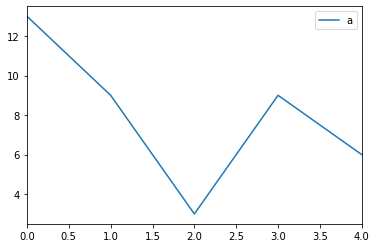

In [11]:
df=pd.DataFrame({'a': [13, 9, 3, 9, 6]})
df.plot()

In [12]:
acf(df['a'])

array([ 1.        , -0.125     , -0.25      ,  0.05357143, -0.17857143])

In [14]:
pacf(df['a'], nlags=4)

array([ 1.        , -0.15625   , -0.45211879, -0.04026717, -1.36598764])

In [15]:
#lagplots

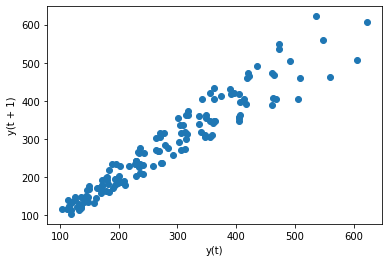

In [18]:
from pandas.plotting import lag_plot
lag_plot(df1['Thousands of Passengers']) #stationary

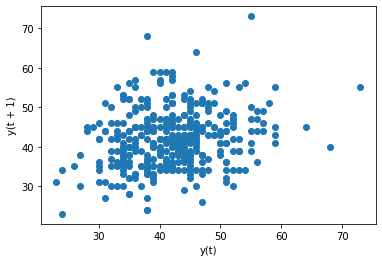

In [19]:
lag_plot(df2['Births'])#non stationary

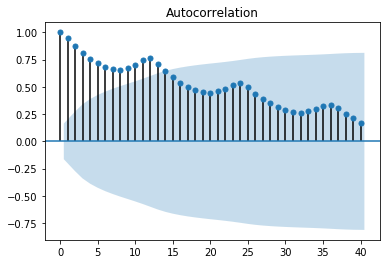

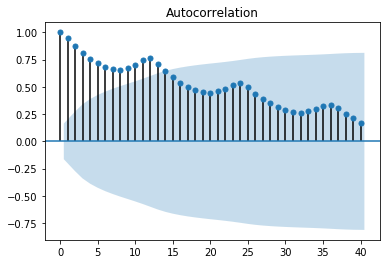

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1['Thousands of Passengers'], lags=40)

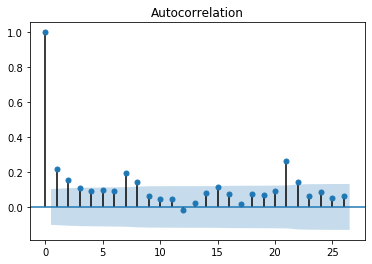

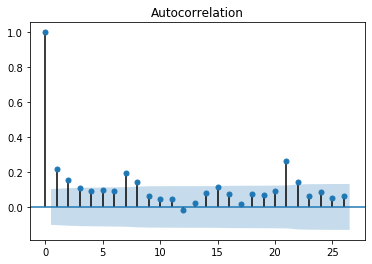

In [23]:
plot_acf(df2['Births'])


# dicky fuller(Stationary vs non stationary)

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [27]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        data series
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression
    
        * 'c' : constant only (default)
        * 'ct' : constant and trend
        * 'ctt' : constant, and linear and quadratic trend
        * 'nc' : no constant, no trend
    autolag : {'AIC', 'BIC', 't-stat', None}
        * if None, then maxlag lags are used
        * if 'AIC' (default) or 'BIC', then the number of lags is chosen
          to minimize the corresponding information 

In [28]:
#pvalue is 0.99 ie above than 0.05 hence non stationary